In [4]:
# Import necessary libraires
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score,roc_curve

from sklearn.model_selection import GridSearchCV # Hyperparameter
from imblearn.over_sampling import SMOTE # handle class imbalance
import pickle # to save the model

# Miscellaneous libraries
pd.set_option('display.max_columns',200)
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load the Breast cancer Dataset
data = load_breast_cancer()
# Description about dataset
print(data['DESCR'])

df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
# Data Preparation
X = df.drop('target', axis=1)
y = df['target']

In [7]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [8]:
# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # fit and transform on the train dataset
X_test_scaled = scaler.transform(X_test) # transforming test dataset

In [3]:
# load the saved model
with open('best_rf_clf.pkl','rb') as f:
    loaded_model = pickle.load(f)

In [10]:
# make the predictions on the test model
y_test_loaded_model = loaded_model.predict(X_test_scaled)

In [11]:
roc_auc_score(y_test,y_test_loaded_model)

0.9626596790042582

In [12]:
loaded_model

RandomForestClassifier(n_estimators=200, random_state=42)

In [17]:
# Calculate the ROC AUC Score
y_pred_proba = loaded_model.predict_proba(X_test_scaled)[:,1]
roc_auc = roc_auc_score(y_test,y_test_loaded_model)
print("ROC AUC Score : ", roc_auc)

ROC AUC Score :  0.9626596790042582


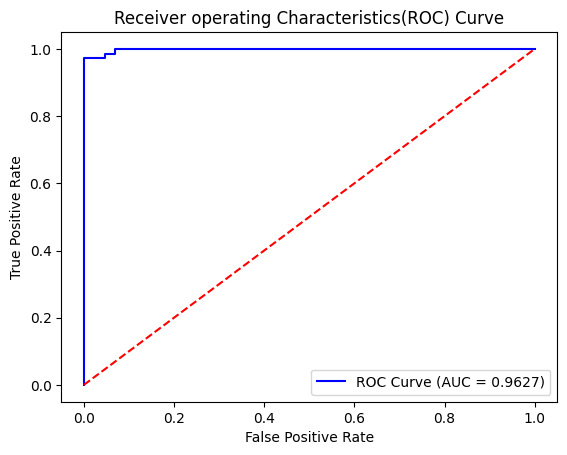

In [18]:
# Plot the ROC AUC Curve
fpr, tpr, tresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color="blue",label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0,1],[0,1],color='red',linestyle ='--')
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Characteristics(ROC) Curve")
plt.legend()
plt.show()